In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
from pandas.tools.plotting import scatter_matrix
import scipy.stats as scs
from sklearn.model_selection import train_test_split

sys.path.append('../')
import src.features.feature_cleaning as feature_cleaning

colors = ['Macaroni and Cheese']
sns.set_palette(sns.crayon_palette(colors))

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df, fieldofdegree_df, SOCP_labels, schl_labels, major_major, NAICSP_labels_df, MAJ_NAICSP_labels = feature_cleaning.load_dfs()

In [ ]:
MAJ_NAICSP_labels.info()

In [3]:
youngemp_df = feature_cleaning.clean_that_target(df, SOCP_labels)

../src/features/feature_cleaning.py:79: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SOCPdf = df.dropna(axis='index', subset=['SOCP'])[df.SOCP != '999920']


Number of employed people: 218454
Percent employed people: 0.5785711448056677
Number of young employed people: 77406
Percent young employed people(out of all PUMS): 0.20500827650135733
Number of emp cats: 23


In [10]:
NAICSP_SOCP_df = feature_cleaning.create_NAICSP_SOCP_df(youngemp_df, NAICSP_labels_df, MAJ_NAICSP_labels)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77406 entries, 0 to 77405
Data columns (total 7 columns):
SERIALNO           77406 non-null int64
SOCP               77406 non-null object
MAJ_SOCP           77406 non-null object
MAJ_SOCP_labels    77406 non-null object
NAICSP             77406 non-null object
NAICSP_labels      77406 non-null object
MAJ_NAICSP         77406 non-null object
dtypes: int64(1), object(6)
memory usage: 32.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77406 entries, 0 to 77405
Data columns (total 7 columns):
SERIALNO           77406 non-null int64
SOCP               77406 non-null object
MAJ_SOCP           77406 non-null object
MAJ_SOCP_labels    77406 non-null object
NAICSP             77406 non-null object
NAICSP_labels      77406 non-null object
MAJ_NAICSP         77406 non-null object
dtypes: int64(1), object(6)
memory usage: 32.7 MB
None


In [11]:
NAICSP_SOCP_df.sample(20)

,SERIALNO,SOCP,MAJ_SOCP,MAJ_SOCP_labels,NAICSP,NAICSP_labels,MAJ_NAICSP,MAJ_NAICSP_labels,SERIALNO,SOCP,MAJ_SOCP,NAICSP,NAICSP_labels,MAJ_NAICSP,MAJ_SOCP__Architecture and Engineering,"MAJ_SOCP__Arts, Design, Entertainment, Sports, and Media",MAJ_SOCP__Building and Grounds Cleaning and Maintenance,MAJ_SOCP__Business and Financial Operations,MAJ_SOCP__Community and Social Service,MAJ_SOCP__Computer and Mathematical,MAJ_SOCP__Construction and Extraction,"MAJ_SOCP__Education, Training, and Library","MAJ_SOCP__Farming, Fishing, and Forestry",MAJ_SOCP__Food Preparation and Serving Related,MAJ_SOCP__Healthcare Practitioners and Technical,MAJ_SOCP__Healthcare Support,"MAJ_SOCP__Installation, Maintenance, and Repair",MAJ_SOCP__Legal,"MAJ_SOCP__Life, Physical, and Social Science",MAJ_SOCP__Management,MAJ_SOCP__Military Specific,MAJ_SOCP__Office and Administrative Support,MAJ_SOCP__Personal Care and Service,MAJ_SOCP__Production,MAJ_SOCP__Protective Service,MAJ_SOCP__Sales and Related,MAJ_SOCP__Transportation and Material Moving,MAJ_NAICSP__Accommodation and Food Services,MAJ_NAICSP__Administrative and Support and Waste Management and Remediation Services,"MAJ_NAICSP__Agriculture, Forestry, Fishing and Hunting","MAJ_NAICSP__Arts, Entertainment, and Recreation",MAJ_NAICSP__Construction,MAJ_NAICSP__Educational Services,MAJ_NAICSP__Finance and Insurance,MAJ_NAICSP__Health Care and Social Assistance,MAJ_NAICSP__Information,MAJ_NAICSP__Management of Companies and Enterprises,MAJ_NAICSP__Manufacturing,"MAJ_NAICSP__Mining, Quarrying, and Oil and Gas Extraction",MAJ_NAICSP__Other Services (except Public Administration),"MAJ_NAICSP__Professional, Scientific, and Technical Services",MAJ_NAICSP__Public Administration,MAJ_NAICSP__Real Estate and Rental and Leasing,MAJ_NAICSP__Retail Trade,MAJ_NAICSP__Transportation and Warehousing,MAJ_NAICSP__Utilities,MAJ_NAICSP__Wholesale Trade
60824,2017001164644,532031,53,Transportation and Material Moving,481,TRN-Air Transportation,48,Transportation and Warehousing,2017001164644,532031,53,481,TRN-Air Transportation,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
43433,2017000828989,2911XX,29,Healthcare Practitioners and Technical,6214,MED-Outpatient Care Centers,62,Health Care and Social Assistance,2017000828989,2911XX,29,6214,MED-Outpatient Care Centers,62,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
42920,2017000819043,119013,11,Management,111,AGR-Crop Production,11,"Agriculture, Forestry, Fishing and Hunting",2017000819043,119013,11,111,AGR-Crop Production,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35737,2017000680216,274021,27,"Arts, Design, Entertainment, Sports, and Media",5419Z,"PRF-Other Professional, Scientific, And Techni...",54,"Professional, Scientific, and Technical Services",2017000680216,274021,27,5419Z,"PRF-Other Professional, Scientific, And Techni...",54,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
25270,2017000483047,372012,37,Building and Grounds Cleaning and Maintenance,5617Z,PRF-Services To Buildings And Dwellings (Excep...,56,Administrative and Support and Waste Managemen...,2017000483047,372012,37,5617Z,PRF-Services To Buildings And Dwellings (Excep...,56,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25389,2017000485065,434171,43,Office and Administrative Support,62132,MED-Offices Of Optometrists,62,Health Care and Social Assistance,2017000485065,434171,43,62132,MED-Offices Of Optometrists,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
37977,2017000722444,472150,47,Construction and Extraction,23,"CON-Construction, (The Cleaning Of Buildings A...",23,Construction,2017000722444,472150,47,23,"CON-Construction, (The Cleaning Of Buildings A...",23,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49580,20170009

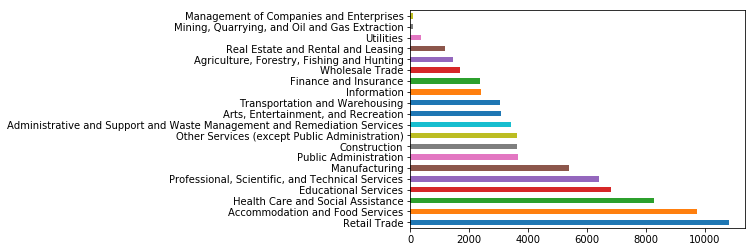

In [20]:
NAICSP_SOCP_df.MAJ_NAICSP_labels.value_counts().plot(kind='barh');

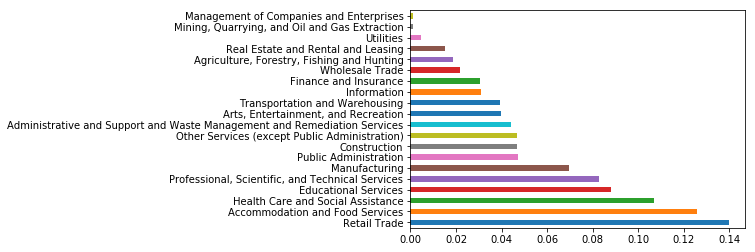

In [21]:
NAICSP_SOCP_df.MAJ_NAICSP_labels.value_counts(normalize=True).plot(kind='barh');

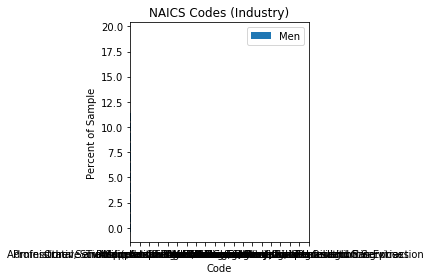

In [31]:
fig, ax = plt.subplots()
index = np.arange(20)

rects1 = ax.barh(index, NAICSP_SOCP_df.MAJ_NAICSP_labels.value_counts(normalize=True),
                label='Men')

#rects2 = ax.bar(index, 
#                label='Women')

ax.set_xlabel('Code')
ax.set_ylabel('Percent of Sample')
ax.set_title('NAICS Codes (Industry)')
ax.set_xticks(index)
ax.set_xticklabels(NAICSP_SOCP_df.MAJ_NAICSP_labels.unique())
ax.legend()

fig.tight_layout()
plt.show()

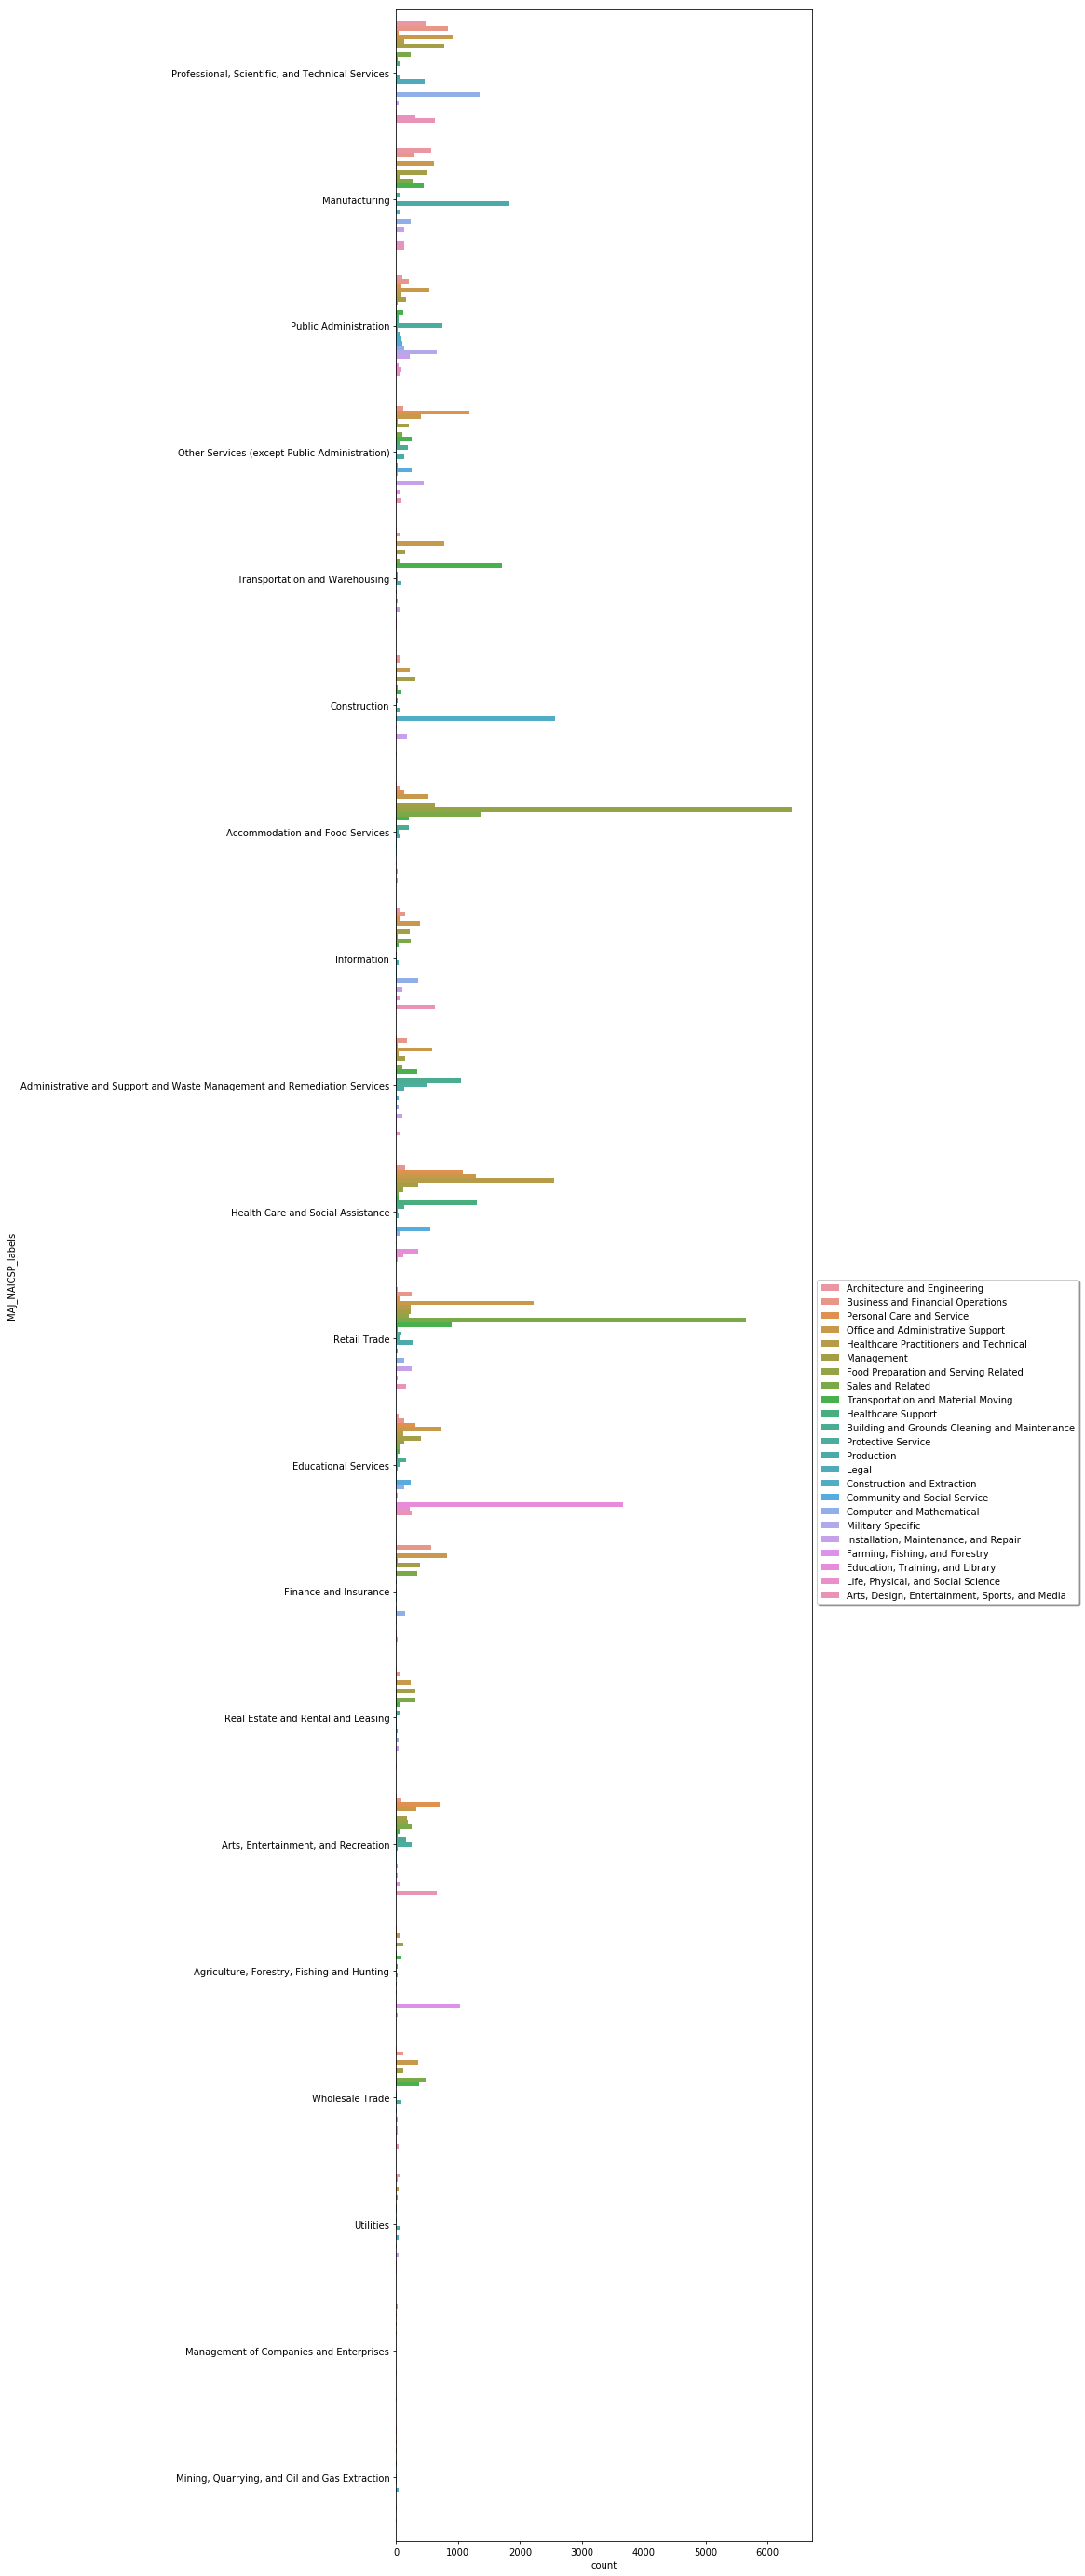

In [60]:
fig, ax = plt.subplots(figsize=(10,50))
sns.countplot(y=NAICSP_SOCP_df.MAJ_NAICSP_labels, hue=NAICSP_SOCP_df.MAJ_SOCP_labels)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True);

NameError: name 'y_vals' is not defined

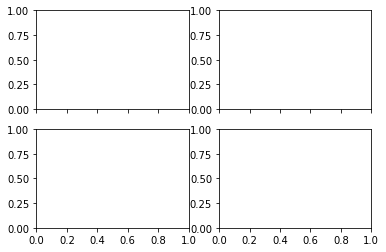

In [61]:
# save this for later

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True);


for ax, title, y in zip(axes.flat, y_vals):
    sns.barplot(y=NAICSP_SOCP_df.MAJ_NAICSP_labels.value_counts(), hue=NAICSP_SOCP_df.MAJ_SOCP_labels)

In [15]:
X = NAICSP_SOCP_df.drop(axis=1, columns=['SERIALNO', 'SOCP', 'MAJ_SOCP', 'MAJ_SOCP_labels', 'NAICSP',	'NAICSP_labels',	'MAJ_NAICSP',	'MAJ_NAICSP_labels'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77406 entries, 0 to 77405
Data columns (total 43 columns):
MAJ_SOCP__Architecture and Engineering                                                  77406 non-null uint8
MAJ_SOCP__Arts, Design, Entertainment, Sports, and Media                                77406 non-null uint8
MAJ_SOCP__Building and Grounds Cleaning and Maintenance                                 77406 non-null uint8
MAJ_SOCP__Business and Financial Operations                                             77406 non-null uint8
MAJ_SOCP__Community and Social Service                                                  77406 non-null uint8
MAJ_SOCP__Computer and Mathematical                                                     77406 non-null uint8
MAJ_SOCP__Construction and Extraction                                                   77406 non-null uint8
MAJ_SOCP__Education, Training, and Library                                              77406 non-null uint8
MAJ_SOCP__Farming, 

In [16]:
X.head()

,MAJ_SOCP__Architecture and Engineering,"MAJ_SOCP__Arts, Design, Entertainment, Sports, and Media",MAJ_SOCP__Building and Grounds Cleaning and Maintenance,MAJ_SOCP__Business and Financial Operations,MAJ_SOCP__Community and Social Service,MAJ_SOCP__Computer and Mathematical,MAJ_SOCP__Construction and Extraction,"MAJ_SOCP__Education, Training, and Library","MAJ_SOCP__Farming, Fishing, and Forestry",MAJ_SOCP__Food Preparation and Serving Related,MAJ_SOCP__Healthcare Practitioners and Technical,MAJ_SOCP__Healthcare Support,"MAJ_SOCP__Installation, Maintenance, and Repair",MAJ_SOCP__Legal,"MAJ_SOCP__Life, Physical, and Social Science",MAJ_SOCP__Management,MAJ_SOCP__Military Specific,MAJ_SOCP__Office and Administrative Support,MAJ_SOCP__Personal Care and Service,MAJ_SOCP__Production,MAJ_SOCP__Protective Service,MAJ_SOCP__Sales and Related,MAJ_SOCP__Transportation and Material Moving,MAJ_NAICSP__Accommodation and Food Services,MAJ_NAICSP__Administrative and Support and Waste Management and Remediation Services,"MAJ_NAICSP__Agriculture, Forestry, Fishing and Hunting","MAJ_NAICSP__Arts, Entertainment, and Recreation",MAJ_NAICSP__Construction,MAJ_NAICSP__Educational Services,MAJ_NAICSP__Finance and Insurance,MAJ_NAICSP__Health Care and Social Assistance,MAJ_NAICSP__Information,MAJ_NAICSP__Management of Companies and Enterprises,MAJ_NAICSP__Manufacturing,"MAJ_NAICSP__Mining, Quarrying, and Oil and Gas Extraction",MAJ_NAICSP__Other Services (except Public Administration),"MAJ_NAICSP__Professional, Scientific, and Technical Services",MAJ_NAICSP__Public Administration,MAJ_NAICSP__Real Estate and Rental and Leasing,MAJ_NAICSP__Retail Trade,MAJ_NAICSP__Transportation and Warehousing,MAJ_NAICSP__Utilities,MAJ_NAICSP__Wholesale Trade
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
X_train, X_test = train_test_split(X, test_size=0.30, random_state=22)

In [63]:
X_train.shape

(54184, 43)

In [ ]:
#need way less dimensions!

In [65]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

#this means there's high multicolinearity

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [72]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.87 * (1 - .87)))
sel.fit_transform(X_train)
feats = sel.get_support(indices=True)
feats

array([17, 39])

In [73]:
X = sel.transform(X_train)

In [77]:
from sklearn.cluster import KMeans
kmeans = KMeans(verbose=10, n_jobs=-1, n_clusters=5)
kmeansfit = kmeans.fit_predict(X)

Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
start iteration
Initialization complete
done sorting
end inner loop
start iteration
done sorting
Initialization complete
Iteration 0, inertia 1.6590774184538506e-21
end inner loop
center shift 4.594428e-13 within tolerance 1.210115e-05
start iteration
Iteration 0, inertia 1.6590774184538506e-21
Initialization complete
done sorting
end inner loop
center shift 4.594428e-13 within tolerance 1.210115e-05
Initialization complete
start iteration
Iteration 0, inertia 1.6590774184538506e-21
start iteration
done sorting
done sorting
Initialization complete
end inner loop
Iteration 0, inertia 1.6590774184538506e-21
center shift 4.594428e-13 within tolerance 1.210115e-05
end inner loop
center shift 4.594428e-13 within tolerance 1.210115e-05
start iteration
done sorting
Iteration 0, inertia 1.6590774184538506e-21
center shift 4.594428e-13 within tolerance 1.210115e-05
end inner loop
Iteration 0, inertia 1.6

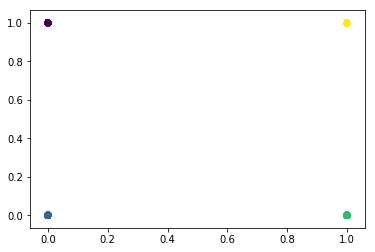

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=kmeansfit)

In [82]:
sel = VarianceThreshold(threshold=(.93 * (1 - .93)))
sel.fit_transform(X_train)
feats = sel.get_support(indices=True)
feats

array([ 9, 17, 21, 23, 28, 30, 36, 39])

In [85]:
X = sel.transform(X_train)
kmeans = KMeans(verbose=10, n_jobs=-1, n_clusters=5)
kmeansfitpredict = kmeans.fit_predict(X)
kmeansfit = kmeans.fit(X)

Initialization complete
start iteration
done sorting
end inner loop
Initialization complete
Iteration 0, inertia 17935.67797784724
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Initialization complete
Iteration 1, inertia 17915.70763266596
Iteration 0, inertia 18563.458149406026
start iteration
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Initialization complete
Iteration 2, inertia 17904.176101016874
Iteration 0, inertia 19221.892187701396
start iteration
start iteration
start iteration
done sorting
done sorting
Iteration 1, inertia 18483.69044260024
end inner loop
done sorting
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 3, inertia 17904.176101016874
Iteration 0, inertia 19019.246812857888
center shift 0.000000e+00 within tolerance 9.960425e-06
start iteration
done sorting
Iteration 1, inertia 19202.762319490354
Initialization complet

In [86]:
kmeansfit.cluster_centers_

array([[ 6.55534490e-01,  5.27927665e-02,  1.40002917e-01,
         1.00000000e+00, -2.95596880e-15,  7.63278329e-16,
        -1.31145095e-14,  6.41153797e-15],
       [ 1.14369103e-02,  1.45523654e-01,  5.36211226e-02,
        -3.50275364e-14,  1.61066992e-01, -7.81874565e-14,
         4.38399317e-14, -1.07219789e-13],
       [ 1.97324858e-02,  2.01297841e-01,  5.18209509e-01,
        -1.06858966e-14,  4.44089210e-16,  7.63278329e-16,
        -1.42663659e-14,  1.00000000e+00],
       [ 1.52512998e-02,  1.56672444e-01,  4.15944541e-03,
        -8.88178420e-15, -9.20097332e-15,  1.00000000e+00,
        -1.07830411e-14,  6.30051566e-15],
       [ 2.20264317e-04,  1.40748899e-01,  3.74449339e-02,
        -6.82787160e-15, -5.52335955e-15,  7.49400542e-16,
         1.00000000e+00,  6.16173779e-15]])

In [88]:
kmeansfit.labels_.shape

(54184,)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

